In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle, Ellipse

## look at photons that arrived at scintillator: where and when?

In [2]:
path = '/Users/erezcohen/Desktop/data/DuSiHodSim/output/csv_files/';

In [115]:
TrappingEff = []
TrappingEffErr = []
sim_results = pd.read_csv(path + 'version_6.0_typical_photons.csv');
Arrived = sim_results[(sim_results['ArrivedAtFrontFacet']==1) & (sim_results['AbsorbedInScintillator']==0)]
Narrived = len(Arrived)
Ntotal = len(sim_results)

In [117]:
print len(Arrived),len(sim_results),'%.1f'%(100.*float(len(Arrived))/len(sim_results))+'% arrived and not absorbed in scintillator'

13944 106609 13.1% arrived and not absorbed in scintillator


In [118]:
def set_axes_fontsize(ax,fontsize):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)

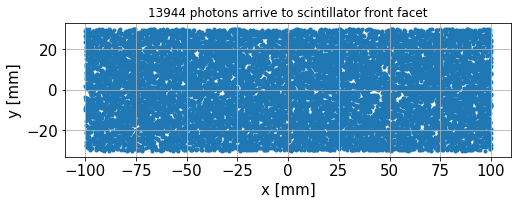

In [119]:
figure,ax = plt.subplots(figsize=(8,8));
plt.scatter( Arrived.HitFrontFacetPosX, Arrived.HitFrontFacetPosY , marker='.')
ax.set_xlabel('x [mm]',fontsize=15);
ax.set_ylabel('y [mm]',fontsize=15);
ax.set_title('%d photons arrive to scintillator front facet'%len(Arrived));
set_axes_fontsize(ax,15)
ax.set_aspect('equal')
ax.grid()

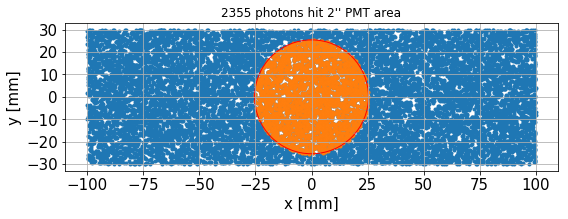

In [127]:
# in PMT
r_PMT = (20/2) * 2.54; # 2'' PMT
InPMTarea = Arrived[ (np.square(Arrived.HitFrontFacetPosX) 
                      + np.square(Arrived.HitFrontFacetPosY)) 
                        <= np.square(r_PMT) ]

figure,ax = plt.subplots(figsize=(8,6));

circ=plt.Circle((0, 0),r_PMT,linewidth=1,edgecolor='r',facecolor='none')
ax.add_artist(circ)
plt.scatter( Arrived.HitFrontFacetPosX, Arrived.HitFrontFacetPosY , marker='.')
plt.scatter( InPMTarea.HitFrontFacetPosX, InPMTarea.HitFrontFacetPosY , marker='.')
ax.set_xlabel('x [mm]',fontsize=15);
ax.set_ylabel('y [mm]',fontsize=15);
ax.set_title('%d photons hit 2\'\' PMT area'%len(InPMTarea));
set_axes_fontsize(ax,15)
ax.set_aspect('equal')
ax.grid()
plt.tight_layout()

In [133]:
time_bins=np.linspace(0,80,81)

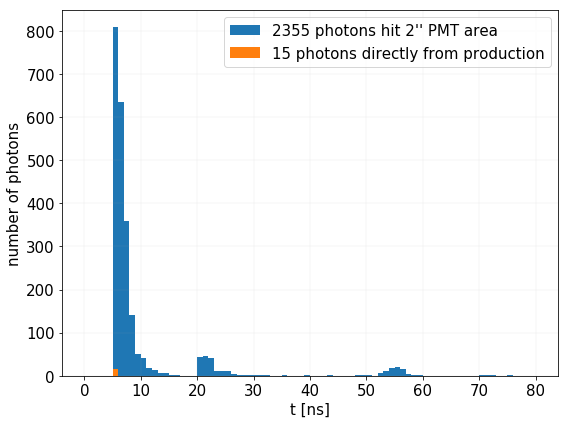

In [134]:
# in PMT
figure,ax = plt.subplots(figsize=(8,6));
plt.hist( InPMTarea.TimeFromStart*1e9 , bins=time_bins , label='%d photons hit 2\'\' PMT area'%len(InPMTarea))

Direct = InPMTarea[InPMTarea.DirectFromProduction==1] 
plt.hist( Direct.TimeFromStart*1e9 , bins=time_bins, label='%d photons directly from production'%len(Direct))
ax.set_xlabel('t [ns]',fontsize=15);
ax.set_ylabel('number of photons',fontsize=15);
set_axes_fontsize(ax,15)
ax.grid(linewidth=0.1)
ax.legend(fontsize=15)
plt.tight_layout()

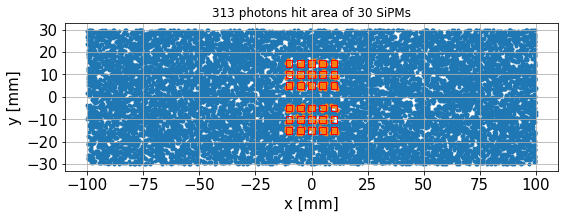

In [136]:
# in SiPM array
aSiPM = 3; # [mm]
margin = 0.1; # [mm]
NSiPMs = 30;
InSiPMarea = pd.DataFrame();
xSiPMs = [-10, -5 , 0 , 5 , 10]
ySiPMs = [-15, -10 , -5 , 5 , 10 , 15]
for xSiPM in xSiPMs:
    for ySiPM in ySiPMs:
        InSiPMarea = pd.concat([InSiPMarea , 
                            Arrived[ (np.abs((Arrived.HitFrontFacetPosX-xSiPM))< float(aSiPM)/2)                        
                                    & (np.abs((Arrived.HitFrontFacetPosY-ySiPM))< float(aSiPM)/2)] ])
        
figure,ax = plt.subplots(figsize=(8,8));
plt.scatter( Arrived.HitFrontFacetPosX, Arrived.HitFrontFacetPosY , marker='.')
plt.scatter( InSiPMarea.HitFrontFacetPosX, InSiPMarea.HitFrontFacetPosY , marker='.')
for xSiPM in xSiPMs:
    for ySiPM in ySiPMs:
        rect = Rectangle((xSiPM-float(aSiPM)/2,ySiPM-float(aSiPM)/2),aSiPM,aSiPM,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)

ax.set_xlabel('x [mm]',fontsize=15);
ax.set_ylabel('y [mm]',fontsize=15);
ax.set_title('%d photons hit area of 30 SiPMs'%len(InSiPMarea));
set_axes_fontsize(ax,15)
ax.set_aspect('equal')
ax.grid()
plt.tight_layout()
# ax.set_xlim(-10,0); ax.set_ylim(-20,0);

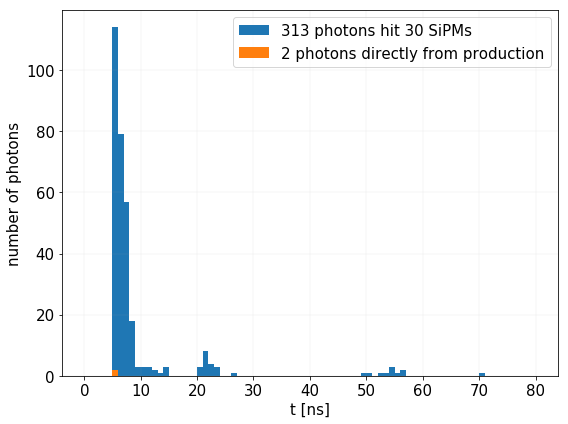

In [138]:
# in PMT
figure,ax = plt.subplots(figsize=(8,6));
plt.hist( InSiPMarea.TimeFromStart*1e9 , bins=time_bins , label='%d photons hit 30 SiPMs'%len(InSiPMarea))

Direct = InSiPMarea[InSiPMarea.DirectFromProduction==1] 
plt.hist( Direct.TimeFromStart*1e9 , bins=time_bins, label='%d photons directly from production'%len(Direct))
ax.set_xlabel('t [ns]',fontsize=15);
ax.set_ylabel('number of photons',fontsize=15);
set_axes_fontsize(ax,15)
ax.grid(linewidth=0.1)
ax.legend(fontsize=15)
plt.tight_layout()